# Capstone Project - Boil-Order Classifier
### Author: Chris Mantell

## LDA and Classification Modeling with Headlines

This notebook shows how I used Headlines of online news articles from the HealthMap Waterborne Illness dataset to infer topics with Latent Dirichlet Allocation (LDA), validated the topics, and built a classification model using these topics as the "ground truth."

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Makes plots show in the notebook without having to do plt.show()
%matplotlib inline

In [2]:
# Load data
df=pd.read_csv('./HealthMap_Scraped.csv')

In [3]:
# Look at Headlines 
df.Headline.head()

0    Kutcher tells Council about water situation - ...
1    Under boil order, Murray awaits water test res...
2    Puerto Ricans at Risk of Waterborne Disease Ou...
3    Howes: In Flint water war, city only has one c...
4    DEP orders PWSA to make critical infrastrucure...
Name: Headline, dtype: object

# Feature Extraction

In [4]:
# Import natural language processing libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.stem import PorterStemmer
import string
from nltk.corpus import stopwords

In [5]:
# Code taken from Richard Harris.  This will clean up the text before using a count vectorizer
def cleaner(text):
    stemmer = PorterStemmer()
    stop = stopwords.words('english')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.translate(str.maketrans('', '', string.digits))
    text = text.lower().strip()
    final_text = []
    for w in text.split():
        if w not in stop:
            final_text.append(stemmer.stem(w.strip()))
    return ' '.join(final_text)

In [6]:
#Extract text dataframe from Headline column
text = pd.DataFrame(df['Headline'])
text

,Headline
0,Kutcher tells Council about water situation - ...
1,"Under boil order, Murray awaits water test res..."
2,Puerto Ricans at Risk of Waterborne Disease Ou...
3,"Howes: In Flint water war, city only has one c..."
4,DEP orders PWSA to make critical infrastrucure...
5,Private water wells in Texas test positive for...
6,How long it could take to repair massive Oakla...
7,"Boil water advisories issued for Clinton, Wils..."
8,Happening Now BREAKING- Boil Water Order Lifte...
9,Boil water order lifted in Astoria - Daily Ast...


In [7]:
# Perform count vectorization on the headline text.  Words only in 1 row will be removed.  This should remove nonpredicitve words. 
cv = CountVectorizer(preprocessor=cleaner, min_df=2)
X = cv.fit_transform(text['Headline'].values)
X

<7724x3115 sparse matrix of type '<class 'numpy.int64'>'
	with 59362 stored elements in Compressed Sparse Row format>

In [8]:
# Find words that got returned from count vectorization.
feature_names = cv.get_feature_names()
feature_names

['abat',
 'abbotsford',
 'abc',
 'abcchicagocom',
 'abccolumbiacom',
 'abccom',
 'abconyoursidecom',
 'aberdeen',
 'abilen',
 'abita',
 'abq',
 'absaroke',
 'acacio',
 'access',
 'accid',
 'acr',
 'across',
 'action',
 'actionnewsjaxcom',
 'activ',
 'ada',
 'adair',
 'adam',
 'adamsvil',
 'addison',
 'addit',
 'address',
 'adel',
 'adirondack',
 'adjust',
 'adrian',
 'advanc',
 'advantag',
 'advertis',
 'advis',
 'adviso',
 'advisori',
 'advisory',
 'advistori',
 'advoc',
 'affect',
 'afternoon',
 'age',
 'agenc',
 'ago',
 'aiken',
 'air',
 'airi',
 'airport',
 'akron',
 'alabama',
 'alamo',
 'alaska',
 'alban',
 'albani',
 'albion',
 'albuquerqu',
 'alcom',
 'alden',
 'alert',
 'alexand',
 'alexandria',
 'alga',
 'allen',
 'allendal',
 'allentown',
 'alma',
 'almost',
 'along',
 'altern',
 'alton',
 'altoona',
 'alvarado',
 'amarillocom',
 'ame',
 'america',
 'american',
 'americanstatesman',
 'amid',
 'amit',
 'amiti',
 'among',
 'amsterdam',
 'anderson',
 'anf',
 'angel',
 'angelo',

**Lots of websites got returned.  Maybe they don't appear in many headlines and it should be okay to continue with LDA.**

# LDA

**This technique will return probabilites of belonging to a number of topics, which is set as a parameter.  My assumption is the text extracted from headlines should have articles relating to boil-orders, articles relating to other waterborne illnesses, and some articles that may be hard to classify.  I also assume that relevent articles will be captured first and then hard to classify articles will be captured afterwards.  I attempted to find the lowest number of topics the seemed to capture the relevent articles with at least one topic that is hard to classify.  This was set at five.**

In [9]:
# Fit LDA on headline text
lda = LatentDirichletAllocation(n_topics=5, random_state=5)

lda.fit(X)

C:\Users\knockitupanotch\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\Users\knockitupanotch\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1, n_topics=5,
             perp_tol=0.1, random_state=5, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [10]:
# Look at shape of LDA 
print(lda.components_.shape)

(5, 3115)


In [11]:
# Turn results of LDA into dataframe.  Rows are LDA topics and columns are words from count vectorizer
results = pd.DataFrame(lda.components_, columns=feature_names)

In [12]:
# Print 25 most used words per topic
for topic in range(5):
    print('Topic', topic)
    word_list = results.T[topic].sort_values(ascending=False).index
    print(' '.join(word_list[0:25]), '\n')

Topic 0
water boil advisori issu order lift effect news counti area daili main break notic kfv custom part citi resid system west precautionari wboytv villag tribun 

Topic 1
beach close bacteria lake due state park news high level patchcom portion swim found coli shore channel sentinel bay river area local counti two island 

Topic 2
boilwat gazett time charleston jacksonvil hill continu offici news creek township wsaztv advis ledger union warn ky say flood chronicl lift columbia lafayett grove lexington 

Topic 3
water drink east road republ coli found sun outbreak nbc test bacteria san newstalk safe contamin wcsi school ktb well coliform witn eagl week posit 

Topic 4
boil order water issu lift counti notic resid news citi boilwat break custom daili alert herald main part journal subscript press star valley kwtx american 



In [13]:
# Import WordCloud library
from wordcloud import WordCloud

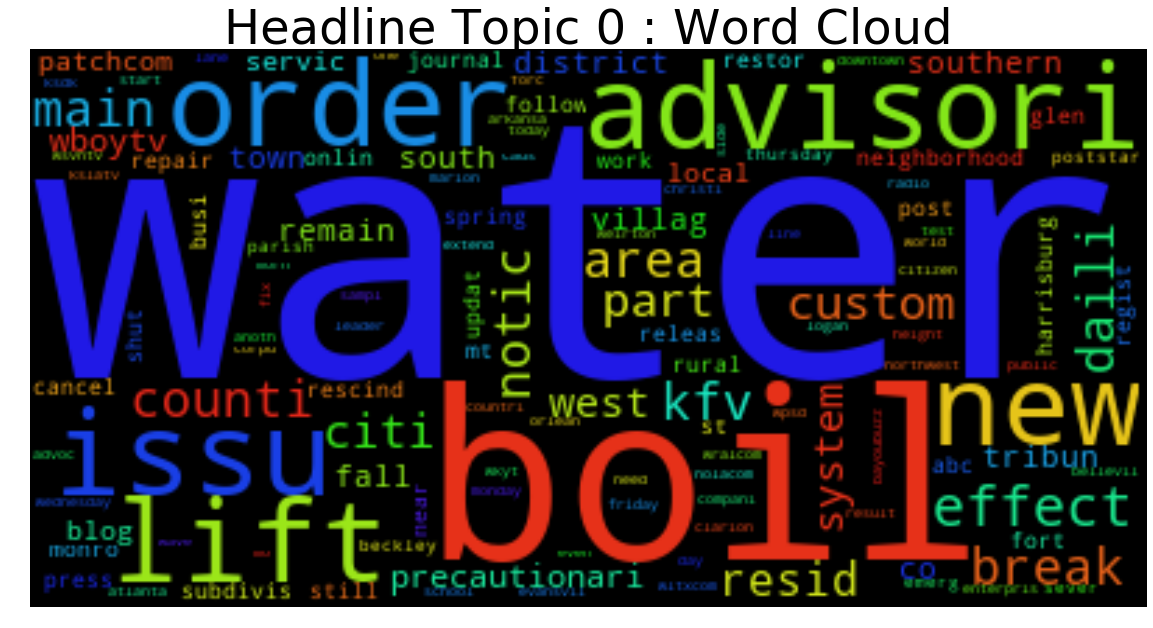

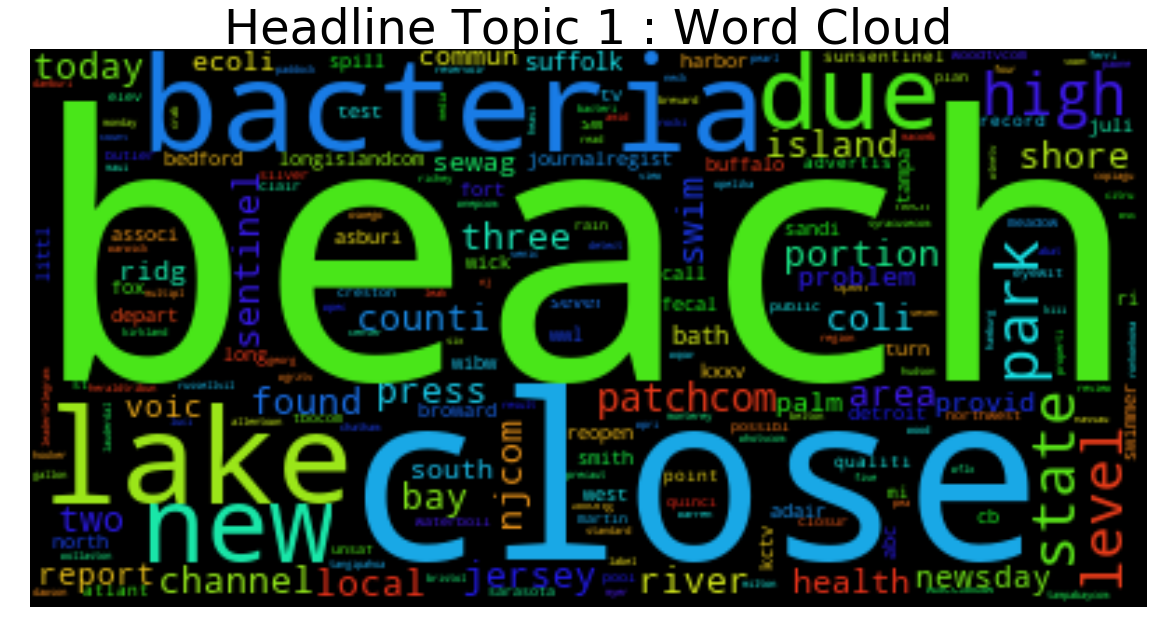

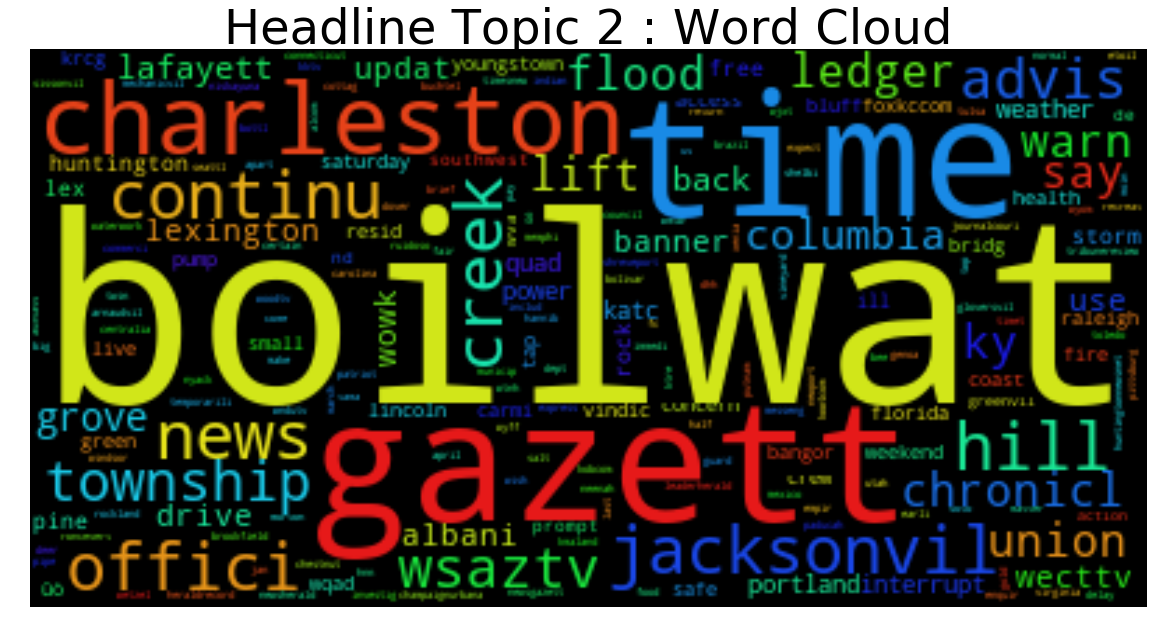

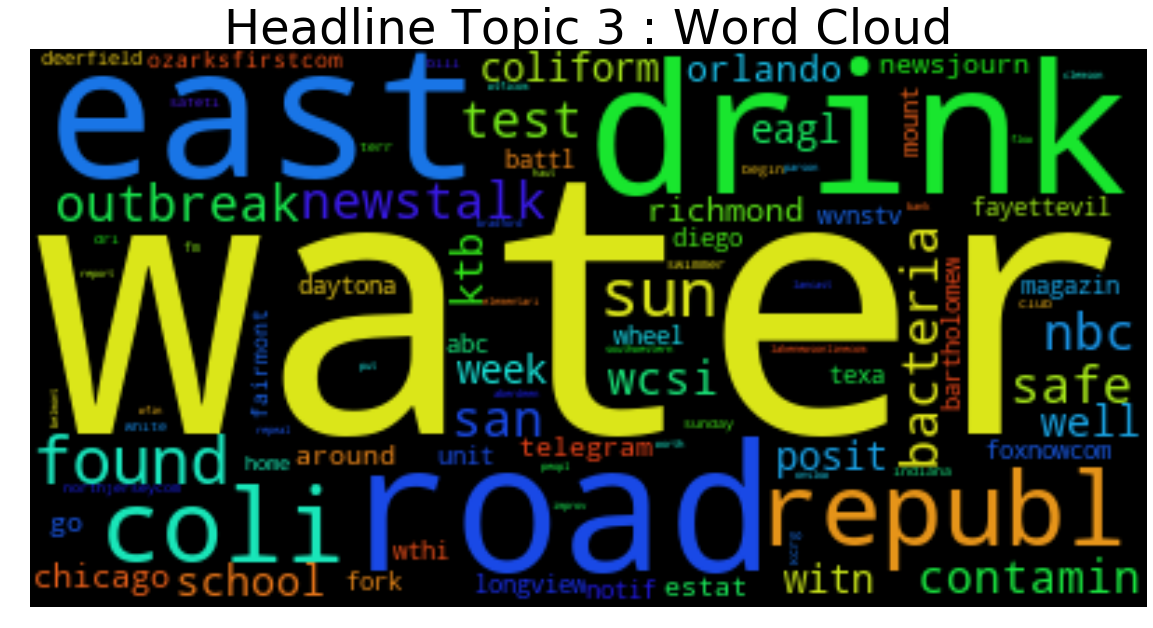

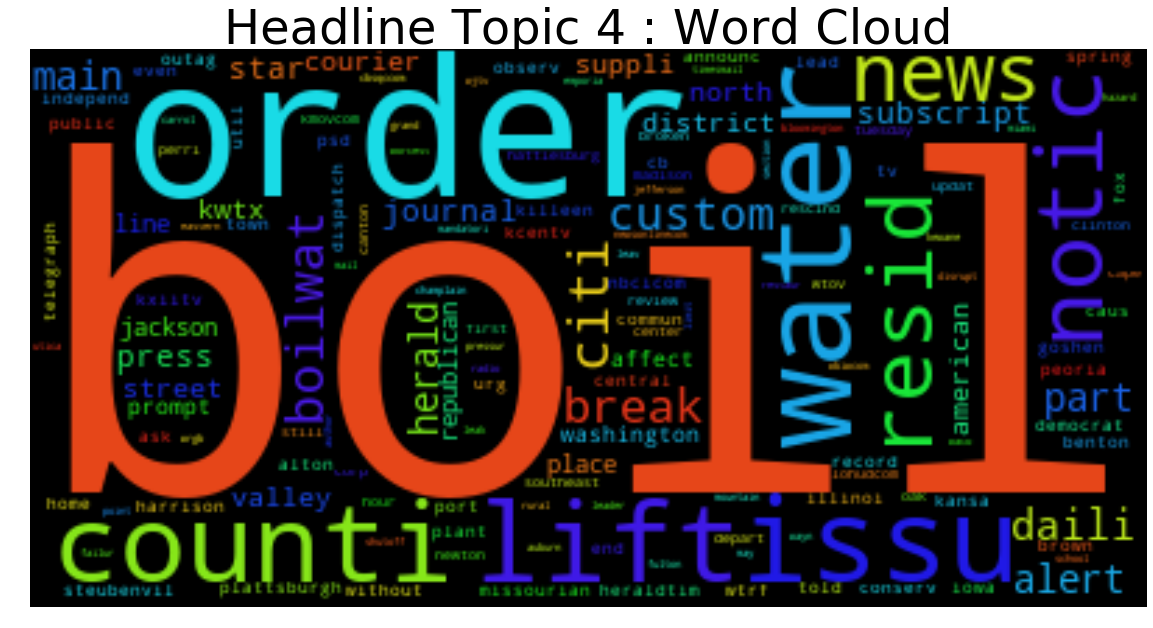

In [14]:
# Create Wordclouds for each topic
for topic in range(5):
    word_counts = []
    words_in_topic = results.T[topic].sort_values(ascending=False)
    
    # This creates a string where frequently used words are added over and over again in the string.  This allows the WordCloud to control the font of frequent words.
    for word, count in words_in_topic.iteritems():
        string = ''.join(((word + ' ')*int(count)))
        word_counts.append(string)
    
    topic_words = ' '.join(word_counts)
    
    cloud = WordCloud().generate(topic_words)
    plt.figure(figsize=(20, 15))
    plt.imshow(cloud)
    plt.title('Headline Topic ' + str(topic) + ' : Word Cloud', fontsize=48)
    plt.axis('off')

# Can We Infer What These Potential Topics Are?

** Topic 0: New boil-orders issued or lifted/repaired.  Precautionary boil-orders.  (Relevant topic)**

** Topic 1: Beach/Lake/River/ swimming areas closed due to bacteria found in water. (Relevant topic)**

** Topic 2: Boil water lifted in many different towns...  Most likely the most dummy of the columns and is hard to classify (Bad topic)**

** Topic 3: Drinking water contaminated affecting schools. (Relevant topic)**

** Topic 4: Boil-order issued, continuing, or lifted. (Relevant topic - Seems to overlap with topic 0)**

In [15]:
# Transforms text data.  Rows correspond the rows of text and the columns are the probabilites of belonging to each LDA generated topic
transformed = lda.transform(X)
transformed

array([[ 0.02598841,  0.02500103,  0.65356219,  0.26981822,  0.02563015],
       [ 0.91830512,  0.02036649,  0.02040395,  0.02069031,  0.02023414],
       [ 0.02000041,  0.1180331 ,  0.02022107,  0.82174496,  0.02000046],
       ..., 
       [ 0.02575011,  0.02544131,  0.39957685,  0.52361944,  0.02561229],
       [ 0.02240092,  0.02226301,  0.02225065,  0.91072769,  0.02235774],
       [ 0.46654405,  0.02254008,  0.0222237 ,  0.24487187,  0.24382031]])

In [16]:
# Check shape of transformed
transformed.shape

(7724, 5)

# Validation

In [17]:
# Prints the headlines most likely belonging to each of the five LDA generated topics.  
# The Headlines should make sense when compared to the infered LDA topics
transformed_df = pd.DataFrame(transformed, columns=range(5))
counter = 0
for i in transformed_df.idxmax():
    print("Topic ", counter, text['Headline'].iloc[i])
    counter += 1

Topic  0 Latest water test clear; one more day of clear testing required to lift boil order - Artesia Daily Press
Topic  1 Aug. 16, 2017 lake test results: Paddock Hooker Lake Association beach closed; Silver Lake County Park beach and ... - West of the I
Topic  2 Flu Numbers Continue To Rise - LEX18.com | Continuous News and StormTracker Weather - LEX18 Lexington KY News
Topic  3 What's Going Around: Swimmer's ear, walking pneumonia, & mosquito bites - ABC27
Topic  4 Goshen boil order issued after water main break affecting North 5th Street - The Elkhart Truth


** Topic 0 is about a boil order.  This PASSES validation!**

** Topic 1 is about a beach being closed.  This PASSES validation!**

** Topic 2 is about the flu and a storm.  This does not seem to relate to waterborne illness and the topic was a set as the "Hard To Classify" topic.  This PASSES validation!**

** Topic 3 is about swimmer's ear.  It doesn't match up with the infered topic but it still has to do with a waterborne illness (Swimmer's ear).  So far this IS NOT validated...**

**Topic 4 is about a boil order.  To distinguish between topic 0 and topic 4, maybe topic 0 is about new boil-orders being issued or lifted and topic 4 is about ongoing or continuing boil orders being issued or lifted.  This topic is hard to distinguish from topic 0 but the article is still about a boil order so this PASSES validation!**

In [18]:
# Lets see what alert tags these articles belong to
transformed_df = pd.DataFrame(transformed, columns=range(5))
counter = 0
for i in transformed_df.idxmax():
    print("Topic ", counter, df['Alert Tag'].iloc[i])
    counter += 1

Topic  0 Warning
Topic  1 Warning
Topic  2 Warning
Topic  3 Warning
Topic  4 Warning


In [19]:
# Look at columns of transformed_df.  The columns are the LDA generated topics
transformed_df.head()

,0,1,2,3,4
0,0.025988,0.025001,0.653562,0.269818,0.025630
1,0.918305,0.020366,0.020404,0.020690,0.020234
2,0.020000,0.118033,0.020221,0.821745,0.020000
3,0.706202,0.207319,0.028680,0.028652,0.029147
4,0.300642,0.025005,0.025661,0.150819,0.497872


In [20]:
# Rename columns
transformed_df.columns = ['Topic_0', 'Topic_1', 'Topic_2', 'Topic_3', 'Topic_4']

In [21]:
# Lookat at new transformed_df
transformed_df.head()

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4
0,0.025988,0.025001,0.653562,0.269818,0.025630
1,0.918305,0.020366,0.020404,0.020690,0.020234
2,0.020000,0.118033,0.020221,0.821745,0.020000
3,0.706202,0.207319,0.028680,0.028652,0.029147
4,0.300642,0.025005,0.025661,0.150819,0.497872


In [22]:
# Topic dictionary.  The keys are the LDA generated topics and the values are my infered topics.
topic_dict = {'Topic_0': 'New boil orders issued or lifted/repaired.  Precautionary boil orders',
              'Topic_1': 'Beach/Lake/River/ swimming areas closed due to bacteria found in water.  Seems to happen in NJ.',
              'Topic_2': 'Boil water lifted in many different towns.  Most likely the most dummy of the columns.',
              'Topic_3': 'Drinking water contaminated affecting schools.  Found safe.',
              'Topic_4': 'Boil order issued, continuing, or lifted.'}

In [23]:
# Look at shape of LDA dataframe.  Rows are the headlines and the columns are the topics
transformed_df.shape

(7724, 5)

In [24]:
# Look at shape of original data.
df.shape

(7724, 14)

In [29]:
# Add new column, "topic" in original data based on highest probability of belonging to an LDA generated topic
for key, topic in enumerate(transformed_df.idxmax(axis=1)):
    if topic == "Topic_0":
        df.at[key, 'topic'] = 'New boil-order issued or repaired'   
    elif topic == 'Topic_1':
        df.at[key, 'topic'] = 'Beach/Lake/Park closed from bacteria in water'
    elif topic == 'Topic_2':
        df.at[key, 'topic'] = 'Hard to classify'
    elif topic == 'Topic_3':
        df.at[key, 'topic'] = 'Drinking water contaminated'
    else:
        df.at[key, 'topic'] = 'Existing boil-order continuing or lifted'

In [30]:
# Look at spread of topics
df.topic.value_counts()

New boil-order issued or repaired                3428
Existing boil-order continuing or lifted         2980
Beach/Lake/Park closed from bacteria in water     661
Hard to classify                                  365
Drinking water contaminated                       290
Name: topic, dtype: int64

**Boil-orders seem to dominate the topics!**

In [50]:
# Lets validate my infered topics with some random rows to see if they match
sample = df.sample(n=20).index
for index in sample:
    print('Headline :', df['Headline'][index])
    print('Alert Tag :', df['Alert Tag'][index])
    print('Topic :', df['topic'][index])
    print('----------------------------------------')

Headline : Boil water advisory issued for parts of 103rd Street - First Coast News
Alert Tag : Warning
Topic : New boil-order issued or repaired
----------------------------------------
Headline : Boil water order issued for Escatawpa residents - WLOX
Alert Tag : Warning
Topic : Existing boil-order continuing or lifted
----------------------------------------
Headline : Boil water advisory in Pine Grove - Republican & Herald
Alert Tag : Warning
Topic : Existing boil-order continuing or lifted
----------------------------------------
Headline : Wagener County Park Beach closed - Huron Daily Tribune
Alert Tag : Warning
Topic : New boil-order issued or repaired
----------------------------------------
Headline : Chanhassen beaches closed due to E.coli - SW News Media
Alert Tag : Warning
Topic : Beach/Lake/Park closed from bacteria in water
----------------------------------------
Headline : Boil order issued for area near Sullivan - Journal Gazette and Times-Courier
Alert Tag : Warning
To

** The topics seem to match mostly.  There are some errors.  A "beach contamination" is really a boil-order.  A "hard to classify" topic is really a boil-order.  A "drinking water contamination" is about swimmer's ear.  However, most boil-orders are matched correctly.  Let's see if we can use this as a ground truth for a classification model.

In [54]:
# Four year boil order was picked up by the HealthMap!  URL got deleted though
df.loc[(df.Location == 'Moore Bend, Missouri, United States')]

,Location,Country,Disease,Species,HM Alert ID,Headline,URL,Issue Date,Alert Tag,Dup Count,Long,Lat,Smooshed Parser Extract,Place Categories,topic
781,"Moore Bend, Missouri, United States",United States,Waterborne Illness,Humans,4889210,4-year Boil Water Order frustrates subdivision...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,3/8/17 23:23,Breaking,4,-94.197166,38.052811,XXXXXX 4-year Boil Water Order frustrates sub...,Waterborne outbreak,Existing boil-order continuing or lifted
4928,"Moore Bend, Missouri, United States",United States,Waterborne Illness,Humans,1526576,Boil Order For Moore Bend Subdivision - komc,deleted,2/2/13 14:09,Warning,0,-94.197166,38.052811,NaN,NaN,Existing boil-order continuing or lifted


# Classification Modeling

In [97]:
# Save the dataframe with infered topics as a new .csv.
df.to_csv('./HealthMap_with_LDA_targets.csv', index=False)

In [7]:
# Load the new data
df = pd.read_csv('./HealthMap_with_LDA_targets.csv')

In [8]:
# Look at first 5 rows.  The topics are now present.
df.head()

,Location,Country,Disease,Species,HM Alert ID,Headline,URL,Issue Date,Alert Tag,Dup Count,Long,Lat,Smooshed Parser Extract,Place Categories,topic
0,"Delaware, United States",United States,Waterborne Illness,Humans,5407609,Kutcher tells Council about water situation - ...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/27/17 1:11,Breaking,0,-75.498100,38.993500,XXXXXX Murray Ledger and Times,NaN,Hard to classify
1,"Kentucky, United States",United States,Waterborne Illness,Humans,5407269,"Under boil order, Murray awaits water test res...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/26/17 18:33,Breaking,8,-84.462898,37.439899,XXXXXX WPSD Local 6,NaN,New boil order issued or repaired
2,Puerto Rico,United States,Waterborne Illness,Humans,5405438,Puerto Ricans at Risk of Waterborne Disease Ou...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/26/17 7:20,Warning,0,-66.501404,18.251301,XXXXXX Close Embed this video More videos (1...,Natural disaster related,Drinking water contaminated
3,"Michigan, United States",United States,Waterborne Illness,Humans,5404851,"Howes: In Flint water war, city only has one c...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/26/17 0:02,Breaking,1,-84.462898,43.580299,XXXXXX FacebookEmail Twitter Google+ LinkedIn...,NaN,New boil order issued or repaired
4,"Pennsylvania, United States",United States,Waterborne Illness,Humans,5404604,DEP orders PWSA to make critical infrastrucure...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/25/17 18:19,Breaking,0,-77.475601,40.930099,XXXXXX {copyShortcut} to copy Link copied! Up...,NaN,Existing boil order continuing or lifted


**It is hard to distinguish between a "new boil-order" and an "existing boil-order" based on Headlines alone.**

In [9]:
# Will try to predict boil order by headline
# Will combine new boil order and existing boil order as one target and make binomial classification
df.topic.value_counts()

New boil order issued or repaired                3428
Existing boil order continuing or lifted         2980
Beach/Lake/Park closed from bacteria in water     661
Hard to classify                                  365
Drinking water contaminated                       290
Name: topic, dtype: int64

In [10]:
# Combine boil-order classes.  1 will be boil-orders and 0 will be non-boil orders.
for key, value in enumerate(df.topic):
    if value == 'New boil order issued or repaired' or value == 'Existing boil order continuing or lifted':
        df.at[key, 'topic'] = 1
    else:
        df.at[key, 'topic'] = 0

In [11]:
# Look at spread of binomial class.  Boil-orders dominate.
df.topic.value_counts()

1    6408
0    1316
Name: topic, dtype: int64

In [12]:
# Find baseline accuracy.  My model will have to beat this score
baseline = 6408/(6408 + 1316)
baseline

0.8296219575349559

In [13]:
# Import libraries for pipelines, NLP, and training/testing
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
import string

In [14]:
# Set target and X columns
X = df['Headline']
target = df['topic']

In [15]:
# Split into training and testing sets.  Target is stratified
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size =0.33, stratify=target)

In [16]:
# Show shapes of trainig and testing sets.
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(5175,) (5175,) (2549,) (2549,)


In [17]:
# Fit count vectorizer to training data
cv = CountVectorizer(preprocessor=cleaner)
cv.fit(X_train)

# Make new dataframe of words from count vectorizer
words = pd.DataFrame(cv.transform(X_train).todense(), columns=cv.get_feature_names())

# Print top 10 words used in whole dataset.
print(words.sum().sort_values(ascending=False).head(10))

boil        3861
water       3692
order       2234
issu        1520
advisori    1464
lift         886
news         605
counti       512
beach        414
notic        395
dtype: int64


In [18]:
# Check shape of new dataframe, words
print(words.shape)

(5175, 4542)


**Not many features.  May not need to do TruncatedSVD or limit words.  May want to use n_grams of 2.**

In [19]:
# Look at head of words
words.head()

,ab,abat,abbotsford,abc,abccolumbiacom,abccom,abcnewscom,abconyoursidecom,aberdeen,abid,...,yuma,zanesvil,zeigler,zeitung,zion,ûïhigh,ûïprecautionari,ûò,ûó,ûü
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


** Still some nonsense words.  Looks like a lot of web links.  Probably got this after removing periods.**

**Let's try these features for modeling out the box before tuning.**

In [20]:
# Need to transform targets into lists for sklearn to work
y_test = list(y_test)
y_train = list(y_train)

In [21]:
# Import libraries for classification algorithms and classification metrics 
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

### Random Forest

In [50]:
# Make modeling steps for random forest
rfc_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ("rfc", RandomForestClassifier())
]

In [51]:
# Make random forest pipeline
rfc_pipe = Pipeline(rfc_modeling_steps)

In [52]:
# Fit random forest pipe
rfc_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [53]:
# Check score and metrics for random forest training set
print(rfc_pipe.score(X_train,y_train))
train_predictions = rfc_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.996328502415
[[ 866   16]
 [   3 4290]]
             precision    recall  f1-score   support

          0       1.00      0.98      0.99       882
          1       1.00      1.00      1.00      4293

avg / total       1.00      1.00      1.00      5175



**Looks overfit!**

In [58]:
# Check score and metrics for random forest testing set
print(rfc_pipe.score(X_test, y_test))
test_predictions = rfc_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.939191839937
[[ 306  128]
 [  27 2088]]
             precision    recall  f1-score   support

          0       0.92      0.71      0.80       434
          1       0.94      0.99      0.96      2115

avg / total       0.94      0.94      0.94      2549



**Good amount of false negatives but better than baseline!**

### Logistic Regression

In [59]:
# Make modeling steps for logistic regression
log_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ("log_reg", LogisticRegressionCV(scoring='accuracy'))
]

In [63]:
# Make logistic regression pipeline
log_pipe = Pipeline(log_modeling_steps)

In [61]:
# Fit logistic regression pipe
log_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...None,
           refit=True, scoring='accuracy', solver='lbfgs', tol=0.0001,
           verbose=0))])

In [62]:
# Check score and metrics for logistic regression training set
print(log_pipe.score(X_train,y_train))
train_predictions = log_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.993236714976
[[ 852   30]
 [   5 4288]]
             precision    recall  f1-score   support

          0       0.99      0.97      0.98       882
          1       0.99      1.00      1.00      4293

avg / total       0.99      0.99      0.99      5175



**Overfit**

In [64]:
# Check score and metrics for logistic regression testing set
print(log_pipe.score(X_test,y_test))
test_predictions = log_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.955276579051
[[ 356   78]
 [  36 2079]]
             precision    recall  f1-score   support

          0       0.91      0.82      0.86       434
          1       0.96      0.98      0.97      2115

avg / total       0.95      0.96      0.95      2549



** Less false negatives, more false positives.  Better though!**

### K Nearest Neighbors

In [65]:
# Make modeling steps for KNN
knn_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ('knn', KNeighborsClassifier())   
]

In [66]:
# Make KNN pipeline
knn_pipe = Pipeline(knn_modeling_steps)

In [67]:
# Fit KNN pipe
knn_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...owski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))])

In [68]:
# Check score and metrics for KNN training set
print(knn_pipe.score(X_train,y_train))
train_predictions = knn_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.945507246377
[[ 640  242]
 [  40 4253]]
             precision    recall  f1-score   support

          0       0.94      0.73      0.82       882
          1       0.95      0.99      0.97      4293

avg / total       0.95      0.95      0.94      5175



**Maybe less overfit but maybe not as good...**

In [69]:
# Check score and metrics for KNN testing set
print(knn_pipe.score(X_test,y_test))
test_predictions = knn_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.930953315026
[[ 290  144]
 [  32 2083]]
             precision    recall  f1-score   support

          0       0.90      0.67      0.77       434
          1       0.94      0.98      0.96      2115

avg / total       0.93      0.93      0.93      2549



**Not as good**

### Support Vector Machine (SVM)

In [70]:
# Make modeling steps for SVM
svm_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ("svm", SVC())
]

In [71]:
# Make SVM pipeline
svm_pipe = Pipeline(svm_modeling_steps)

In [72]:
# Fit SVM pipe
svm_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [73]:
# Check score and metrics for SVM training set
print(svm_pipe.score(X_train,y_train))
train_predictions = svm_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.829565217391
[[   0  882]
 [   0 4293]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       882
          1       0.83      1.00      0.91      4293

avg / total       0.69      0.83      0.75      5175



C:\Users\knockitupanotch\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Same as baseline.  Should try a different kernel than Radial Basis Function (RBF).**

In [74]:
# Check score and metrics for SVM testing set
print(svm_pipe.score(X_test, y_test))
test_predictions = svm_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.829737151824
[[   0  434]
 [   0 2115]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       434
          1       0.83      1.00      0.91      2115

avg / total       0.69      0.83      0.75      2549



C:\Users\knockitupanotch\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Same as baseline.  Should try a different kernel than Radial Basis Function (RBF).**


### Linear SVM

In [75]:
# Make modeling steps for Linear SVM
svm_linear_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ("svm", SVC(kernel='linear'))
]

In [76]:
# Make linear SVM pipeline
svm_linear_pipe = Pipeline(svm_linear_modeling_steps)

In [77]:
# Fit linear SVM pipe
svm_linear_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [78]:
# Check score and metrics for linear SVM training set
print(svm_linear_pipe.score(X_train,y_train))
train_predictions = svm_linear_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.995169082126
[[ 862   20]
 [   5 4288]]
             precision    recall  f1-score   support

          0       0.99      0.98      0.99       882
          1       1.00      1.00      1.00      4293

avg / total       1.00      1.00      1.00      5175



**Overfit but at least it works compared to an RBF SVM**

In [79]:
# Check score and metrics for linear SVM testing set
print(svm_linear_pipe.score(X_test, y_test))
test_predictions = svm_linear_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.95370733621
[[ 371   63]
 [  55 2060]]
             precision    recall  f1-score   support

          0       0.87      0.85      0.86       434
          1       0.97      0.97      0.97      2115

avg / total       0.95      0.95      0.95      2549



**Pretty good but not better than logistic regression**

### Polynomial SVM

In [80]:
# Make modeling steps for Poly SVM
svm_poly_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ("svm", SVC(kernel='poly', degree=3))
]

In [81]:
# Make Poly SVM pipeline
svm_poly_pipe = Pipeline(svm_poly_modeling_steps)

In [82]:
# Fit Poly SVM pipe
svm_poly_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [83]:
# Check score and metrics for Poly SVM training set
print(svm_poly_pipe.score(X_train,y_train))
train_predictions = svm_poly_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.829565217391
[[   0  882]
 [   0 4293]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       882
          1       0.83      1.00      0.91      4293

avg / total       0.69      0.83      0.75      5175



C:\Users\knockitupanotch\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Data is definately not spread out in polynomial fashion!**

In [84]:
# Check score and metrics for Poly SVM testing set
print(svm_poly_pipe.score(X_test, y_test))
test_predictions = svm_poly_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.829737151824
[[   0  434]
 [   0 2115]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       434
          1       0.83      1.00      0.91      2115

avg / total       0.69      0.83      0.75      2549



C:\Users\knockitupanotch\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Data is definately not spread out in polynomial fashion!**

### Bagging (Logistic Regression)

In [22]:
# Import bagging classifier library
from sklearn.ensemble import BaggingClassifier

In [22]:
# Instantiate logistic regression classifier
log_reg = LogisticRegressionCV()

In [28]:
# Make modeling steps for Bagged Logistic Regression
bag_log_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ("log_reg_bagger", BaggingClassifier(log_reg, n_estimators=15))
]

In [29]:
# Make Bagged Logistic Regression pipeline
bag_log_pipe = Pipeline(bag_log_modeling_steps)

In [126]:
# Fit Bagged Logistic Regression pipe
bag_log_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...estimators=15, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False))])

In [127]:
# Check score and metrics for Bagged Logistic Regression training set
print(bag_log_pipe.score(X_train,y_train))
train_predictions = bag_log_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.984541062802
[[ 812   70]
 [  10 4283]]
             precision    recall  f1-score   support

          0       0.99      0.92      0.95       882
          1       0.98      1.00      0.99      4293

avg / total       0.98      0.98      0.98      5175



**Not as overfit!**

In [128]:
# Check score and metrics for Bagged Logistic Regression testing set
print(bag_log_pipe.score(X_test, y_test))
test_predictions = bag_log_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.95409964692
[[ 345   89]
 [  28 2087]]
             precision    recall  f1-score   support

          0       0.92      0.79      0.86       434
          1       0.96      0.99      0.97      2115

avg / total       0.95      0.95      0.95      2549



**Worse accuracy but better with true positives!  Better recall too.  May just need more estimators.**

### Baging (KNN)

Before doing bagging with KNN, let's tinker around with the number of neighbors hyperparameter and see how our results change...

In [54]:
# Make modeling steps for KNN with 3 neighbors
knn_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ('knn', KNeighborsClassifier(n_neighbors=3))   
]

In [55]:
# Make KNN with 3 neighbors pipeline
knn_pipe = Pipeline(knn_modeling_steps)

In [56]:
# Fit KNN with 3 neighbors pipe
knn_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...owski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform'))])

In [57]:
# Check score and metrics for KNN with 3 neighbors training set
print(knn_pipe.score(X_train,y_train))
train_predictions = knn_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.9638647343
[[ 749  133]
 [  54 4239]]
             precision    recall  f1-score   support

          0       0.93      0.85      0.89       882
          1       0.97      0.99      0.98      4293

avg / total       0.96      0.96      0.96      5175



**More true negatives and better accuracy, but less true positives**

In [58]:
# Check score and metrics for KNN with 3 neighbors testing set
print(knn_pipe.score(X_test, y_test))
test_predictions = knn_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.939584150647
[[ 333  101]
 [  53 2062]]
             precision    recall  f1-score   support

          0       0.86      0.77      0.81       434
          1       0.95      0.97      0.96      2115

avg / total       0.94      0.94      0.94      2549



**More true negatives and better accuracy, but less true positives**

In [59]:
# Make modeling steps for KNN with 7 neighbors
knn_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ('knn', KNeighborsClassifier(n_neighbors=7))   
]

In [60]:
# Make KNN with 7 neighbors pipeline
knn_pipe = Pipeline(knn_modeling_steps)

In [61]:
# Fit KNN with 7 neighbors pipe
knn_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...owski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform'))])

In [62]:
# Check score and metrics for KNN with 7 neighbors training set
print(knn_pipe.score(X_train,y_train))
train_predictions = knn_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.941449275362
[[ 624  258]
 [  45 4248]]
             precision    recall  f1-score   support

          0       0.93      0.71      0.80       882
          1       0.94      0.99      0.97      4293

avg / total       0.94      0.94      0.94      5175



**Not as good as original KNN**

In [63]:
# Check score and metrics for KNN with 7 neighbors testing set
print(knn_pipe.score(X_test, y_test))
test_predictions = knn_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.931737936446
[[ 293  141]
 [  33 2082]]
             precision    recall  f1-score   support

          0       0.90      0.68      0.77       434
          1       0.94      0.98      0.96      2115

avg / total       0.93      0.93      0.93      2549



**Not as good as original KNN**

### Try 3 neightbors with a bag

In [72]:
# Instantiate KNN classifier with 4 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

In [73]:
# Make modeling steps for Bagged KNN
bag_knn_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ("knn_bagger", BaggingClassifier(knn, n_estimators=15))
]

In [74]:
# Make Bagged KNN pipeline
knn_bag_pipe = Pipeline(bag_knn_modeling_steps)

In [75]:
# Fit Bagged KNN pipe
knn_bag_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...estimators=15, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False))])

In [76]:
# Check score and metrics for Bagged KNN training set
print(knn_bag_pipe.score(X_train,y_train))
train_predictions = knn_bag_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.966570048309
[[ 741  141]
 [  32 4261]]
             precision    recall  f1-score   support

          0       0.96      0.84      0.90       882
          1       0.97      0.99      0.98      4293

avg / total       0.97      0.97      0.97      5175



**Better accuracy and much more true positives!**

In [77]:
# Check score and metrics for Bagged KNN testing set
print(knn_bag_pipe.score(X_test, y_test))
test_predictions = knn_bag_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.937230286387
[[ 313  121]
 [  39 2076]]
             precision    recall  f1-score   support

          0       0.89      0.72      0.80       434
          1       0.94      0.98      0.96      2115

avg / total       0.94      0.94      0.93      2549



**Slightly lower accuracy but some more true positives**

### Bagging (Linear SVM)

In [78]:
# Instantiate linear SVM
svm = SVC(kernel='linear')

In [79]:
# Make modelling steps for Bagged linear SVM
bag_svm_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ("svm_bagger", BaggingClassifier(svm, n_estimators=10))
]

In [80]:
# Make Bagged SVM pipeline
svm_bag_pipe = Pipeline(bag_svm_modeling_steps)

In [81]:
# Fit Bagged SVM pipe
svm_bag_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False))])

In [82]:
# Check score and metrics for Bagged linear SVM training set
print(svm_bag_pipe.score(X_train,y_train))
train_predictions = svm_bag_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.992657004831
[[ 859   23]
 [  15 4278]]
             precision    recall  f1-score   support

          0       0.98      0.97      0.98       882
          1       0.99      1.00      1.00      4293

avg / total       0.99      0.99      0.99      5175



**Worse than normal linear SVM.  Maybe try more estimators.**

In [83]:
# Check score and metrics for Bagged linear SVM testing set
print(svm_bag_pipe.score(X_test, y_test))
test_predictions = svm_bag_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.948607296979
[[ 347   87]
 [  44 2071]]
             precision    recall  f1-score   support

          0       0.89      0.80      0.84       434
          1       0.96      0.98      0.97      2115

avg / total       0.95      0.95      0.95      2549



**Less accuracy but more true positives.  Try with more estimators.**

In [89]:
# Make modelling steps for Bagged linear SVM - 15 estimators
bag_svm_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ("svm_bagger", BaggingClassifier(svm, n_estimators=15))
]

In [90]:
# Make Bagged SVM - 15 estimators pipeline
svm_bag_pipe = Pipeline(bag_svm_modeling_steps)

In [91]:
# Fit Bagged SVM - 15 estimators pipe
svm_bag_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...estimators=15, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False))])

In [139]:
# Check score and metrics for Bagged linear SVM -15 estimators training set
print(svm_bag_pipe.score(X_train,y_train))
train_predictions = svm_bag_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.992270531401
[[ 852   30]
 [  10 4283]]
             precision    recall  f1-score   support

          0       0.99      0.97      0.98       882
          1       0.99      1.00      1.00      4293

avg / total       0.99      0.99      0.99      5175



**15 bags increases true positives but not true negatives.  Still not has good as 1 SVM**

In [140]:
# Check score and metrics for Bagged linear SVM -15 estimators training set
print(svm_bag_pipe.score(X_test, y_test))
test_predictions = svm_bag_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.95056885053
[[ 354   80]
 [  46 2069]]
             precision    recall  f1-score   support

          0       0.89      0.82      0.85       434
          1       0.96      0.98      0.97      2115

avg / total       0.95      0.95      0.95      2549



**Better accuracy and more true negatives but slightly less true positives.  Not as good as 1 SVM**

### Bagging (Random Forest)

Before bagging, let's tune a random forest classifier to see if we can get increase in accuracy...

In [145]:
# Let's see how to tune the model first with 15 random forest estimators in the modeling steps
rfc_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ("rfc", RandomForestClassifier(n_estimators=15))
]

In [146]:
# Make random forest pipeline
rfc_pipe = Pipeline(rfc_modeling_steps)

In [147]:
# Fit random forest pipe
rfc_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [148]:
# Check score and metrics for Random Forest training set
print(rfc_pipe.score(X_train,y_train))
train_predictions = rfc_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.997101449275
[[ 867   15]
 [   0 4293]]
             precision    recall  f1-score   support

          0       1.00      0.98      0.99       882
          1       1.00      1.00      1.00      4293

avg / total       1.00      1.00      1.00      5175



**Better with in everything with more estimators!**

In [149]:
# Check score and metrics for Random Forest testing set
print(rfc_pipe.score(X_test, y_test))
test_predictions = rfc_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.944291879168
[[ 311  123]
 [  19 2096]]
             precision    recall  f1-score   support

          0       0.94      0.72      0.81       434
          1       0.94      0.99      0.97      2115

avg / total       0.94      0.94      0.94      2549



**Better with in everything with more estimators!  Let's make a Bag of Forests (Forest Primeval!)**

In [30]:
# Instantiate random forest with 15 estimators
rfc = RandomForestClassifier(n_estimators=15)

In [31]:
# Make modeling steps for Bagged Random Forest
rfc_bag_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ("rfc_bagger", BaggingClassifier(rfc, n_estimators=15))
]

In [32]:
# Make Bagged Random Forest pipeline
rfc_bag_pipe = Pipeline(rfc_bag_modeling_steps)

In [156]:
# Fit Bagged Random Forest pipe
rfc_bag_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...estimators=15, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False))])

In [157]:
# Check score and metrics for Bagged Random Forest training set
print(rfc_bag_pipe.score(X_train,y_train))
train_predictions = rfc_bag_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.976811594203
[[ 768  114]
 [   6 4287]]
             precision    recall  f1-score   support

          0       0.99      0.87      0.93       882
          1       0.97      1.00      0.99      4293

avg / total       0.98      0.98      0.98      5175



**Not as good but maybe not as overfit...**

In [158]:
# Check score and metrics for Bagged Random Forest testing set
print(rfc_bag_pipe.score(X_test, y_test))
test_predictions = rfc_bag_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.937622597097
[[ 288  146]
 [  13 2102]]
             precision    recall  f1-score   support

          0       0.96      0.66      0.78       434
          1       0.94      0.99      0.96      2115

avg / total       0.94      0.94      0.93      2549



**Not as good but more true positives**

### AdaBoosting (Base Boosting Model Using A Decision Tree)

In [100]:
# Import boosting libraries and decision tree
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [161]:
# Make base AdaBoost modeling steps
base_ada_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ("base_ada", AdaBoostClassifier())
]

In [162]:
# Make base AdaBoost pipeline
base_ada_pipe = Pipeline(base_ada_modeling_steps)

In [163]:
# Fit base AdaBoost pipe
base_ada_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...m='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None))])

In [164]:
# Check score and metrics for base AdaBoost training set
print(base_ada_pipe.score(X_train,y_train))
train_predictions = base_ada_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.935265700483
[[ 657  225]
 [ 110 4183]]
             precision    recall  f1-score   support

          0       0.86      0.74      0.80       882
          1       0.95      0.97      0.96      4293

avg / total       0.93      0.94      0.93      5175



**Meh...**

In [165]:
# Check score and metrics for base AdaBoost testing set
print(base_ada_pipe.score(X_test, y_test))
test_predictions = base_ada_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.924676343664
[[ 305  129]
 [  63 2052]]
             precision    recall  f1-score   support

          0       0.83      0.70      0.76       434
          1       0.94      0.97      0.96      2115

avg / total       0.92      0.92      0.92      2549



**Not that great**

### AdaBoost (Logistic Regression)

In [93]:
# Let's try to tune a logsitic regression by instantiate a new one
log_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ("log_reg", LogisticRegressionCV(scoring='accuracy', Cs=100, cv=5))
]

In [94]:
# Make new logistic regression pipeline
log_pipe = Pipeline(log_modeling_steps)

In [95]:
# Fit new logistic regression pipe
log_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...None,
           refit=True, scoring='accuracy', solver='lbfgs', tol=0.0001,
           verbose=0))])

In [96]:
# Check score and metrics for logistic regression training set
print(log_pipe.score(X_train,y_train))
train_predictions = log_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.997487922705
[[ 872   10]
 [   3 4290]]
             precision    recall  f1-score   support

          0       1.00      0.99      0.99       882
          1       1.00      1.00      1.00      4293

avg / total       1.00      1.00      1.00      5175



**Better than base logistic regression!**

In [97]:
# Check score and metrics for logistic regression testing set
print(log_pipe.score(X_test,y_test))
test_predictions = log_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.955276579051
[[ 352   82]
 [  32 2083]]
             precision    recall  f1-score   support

          0       0.92      0.81      0.86       434
          1       0.96      0.98      0.97      2115

avg / total       0.95      0.96      0.95      2549



**Same accuracy but more true positives.  Let's use this and boost it**

In [98]:
# Instantiate new logistic regression
log_reg = LogisticRegressionCV(Cs=100, cv=5)

In [101]:
# Make modeling steps for AdaBoosted logistic regression
log_reg_ada_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ("log_reg_ada", AdaBoostClassifier(base_estimator=log_reg))
]

In [103]:
# Make AdaBoosted logistic regression pipeline
log_reg_ada_pipe= Pipeline(log_reg_ada_modeling_steps)

In [104]:
# Fit AdaBoosted logistic regression pipe
log_reg_ada_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...='lbfgs', tol=0.0001, verbose=0),
          learning_rate=1.0, n_estimators=50, random_state=None))])

In [105]:
# Check score and metrics for AdaBoosted logistic regression training set
print(log_reg_ada_pipe.score(X_train,y_train))
train_predictions = log_reg_ada_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

1.0
[[ 882    0]
 [   0 4293]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       882
          1       1.00      1.00      1.00      4293

avg / total       1.00      1.00      1.00      5175



**Holy overfit!  Base number of estimators for boosting is 50 and gives perfect accuracy.**

In [106]:
# Check score and metrics for AdaBoosted logistic regression testing set
print(log_reg_ada_pipe.score(X_test, y_test))
test_predictions = log_reg_ada_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.95213809337
[[ 355   79]
 [  43 2072]]
             precision    recall  f1-score   support

          0       0.89      0.82      0.85       434
          1       0.96      0.98      0.97      2115

avg / total       0.95      0.95      0.95      2549



**A little better in true negatives but less accurate.  Let's try something MUCH lower than the base of 50 esitmators for AdaBoost.  Let's try 2.**

In [107]:
# Make modeling steps for AdaBoosted logistic regression
log_reg_ada_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ("log_reg_ada", AdaBoostClassifier(base_estimator=log_reg, n_estimators=2))
]

In [108]:
# Make AdaBoosted logistic regression pipeline
log_reg_ada_pipe= Pipeline(log_reg_ada_modeling_steps)

In [109]:
# Fit AdaBoosted logistic regression pipe
log_reg_ada_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...r='lbfgs', tol=0.0001, verbose=0),
          learning_rate=1.0, n_estimators=2, random_state=None))])

In [222]:
# Check score and metrics for AdaBoosted logistic regression training set
print(log_reg_ada_pipe.score(X_train,y_train))
train_predictions = log_reg_ada_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.988405797101
[[ 831   51]
 [   9 4284]]
             precision    recall  f1-score   support

          0       0.99      0.94      0.97       882
          1       0.99      1.00      0.99      4293

avg / total       0.99      0.99      0.99      5175



**Not as good as nonboosted**

In [223]:
# Check score and metrics for AdaBoosted logistic regression testing set
print(log_reg_ada_pipe.score(X_test, y_test))
test_predictions = log_reg_ada_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.95449195763
[[ 351   83]
 [  33 2082]]
             precision    recall  f1-score   support

          0       0.91      0.81      0.86       434
          1       0.96      0.98      0.97      2115

avg / total       0.95      0.95      0.95      2549



**Pretty much the same**

## Let's try reworking the feature extraction with bagged logistic regression and bagged random forest models.

### Let's try ngram(1,2), min_df=2.  Then ngram(1, 2) and truncatedSVD.  Also try tfidvectorizer.

In [23]:
# Import libraries for NLP feature extraction
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
# Instantiate count vectorizer with ngram of (1, 2) and minimum document frequency of 2
cv = CountVectorizer(preprocessor=cleaner, ngram_range=(1,2), min_df=2)
cv.fit(X_train)

# Print top 10 words
words = pd.DataFrame(cv.transform(X_train).todense(), columns=cv.get_feature_names())
print(words.sum().sort_values(ascending=False).head(10))

boil              3836
water             3656
order             2233
boil water        2083
issu              1557
advisori          1452
boil order        1432
water advisori     984
lift               860
order issu         630
dtype: int64


In [44]:
# Look at shape of new count vectorizer data. 
print(words.shape)

(5175, 6143)


**About 2000 more feature than before.  Not too much more that it's unusable**

In [45]:
# Look at head and some words
words.head()

,abat,abat beach,abbotsford,abbotsford medford,abc,abc action,abc news,abc provid,abcchicagocom,abccolumbiacom,...,yuck two,zion,ûò,ûò boil,ûò rockford,ûò updat,ûó,ûó boilwat,ûü,ûü wollaston
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Still some garbage words from web addresses**

### Bagged Random Forest with ngram(1,2), min_df=2.

In [24]:
# Instantiate a Random Forest classifier with 15 estimators
rfc = RandomForestClassifier(n_estimators=15)

In [25]:
# Make modeling steps for Bagged Random Forest
rfc_bag_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner, ngram_range=(1,2), min_df=2)),
    ("rfc_bagger", BaggingClassifier(rfc, n_estimators=15))
]

In [26]:
# Make Bagged Random Forest pipeline
rfc_bag_pipe = Pipeline(rfc_bag_modeling_steps)

In [27]:
# Fit Bagged Random Forest pipe
rfc_bag_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 2),
        preprocessor=<function cleane...estimators=15, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False))])

In [28]:
# Check score and metrics for Bagged Random Forest training set
print(rfc_bag_pipe.score(X_train,y_train))
train_predictions = rfc_bag_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.977004830918
[[ 770  112]
 [   7 4286]]
             precision    recall  f1-score   support

          0       0.99      0.87      0.93       882
          1       0.97      1.00      0.99      4293

avg / total       0.98      0.98      0.98      5175



**Slightly better than standard count vectorizer**

In [29]:
# Check score and metrics for Bagged Random Forest testing set
print(rfc_bag_pipe.score(X_test, y_test))
test_predictions = rfc_bag_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.942330325618
[[ 306  128]
 [  19 2096]]
             precision    recall  f1-score   support

          0       0.94      0.71      0.81       434
          1       0.94      0.99      0.97      2115

avg / total       0.94      0.94      0.94      2549



**Better than stanard count vectorizer!**

### Bagged Logistic Regression with ngram(1,2), min_df=2

In [30]:
# Instatiate Logistic Regression
log_reg = LogisticRegressionCV()

In [31]:
# Make modeling steps for Bagged Logistic Regression
bag_log_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner, ngram_range=(1,2), min_df=2)),
    ("log_reg_bagger", BaggingClassifier(log_reg, n_estimators=15))
]

In [32]:
# Make Bagged Logistic Regression pipeline
bag_log_pipe = Pipeline(bag_log_modeling_steps)

In [33]:
# Fit Bagged Logistic Regression pipe
bag_log_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 2),
        preprocessor=<function cleane...estimators=15, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False))])

In [34]:
# Check score and metrics for Bagged Logistic Regression training set
print(bag_log_pipe.score(X_train,y_train))
train_predictions = bag_log_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.989758454106
[[ 834   48]
 [   5 4288]]
             precision    recall  f1-score   support

          0       0.99      0.95      0.97       882
          1       0.99      1.00      0.99      4293

avg / total       0.99      0.99      0.99      5175



**Better than Random Forest and standard count vectorizer**

In [35]:
# Check score and metrics for Bagged Logistic Regression testing set
print(bag_log_pipe.score(X_test, y_test))
test_predictions = bag_log_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.95292271479
[[ 356   78]
 [  42 2073]]
             precision    recall  f1-score   support

          0       0.89      0.82      0.86       434
          1       0.96      0.98      0.97      2115

avg / total       0.95      0.95      0.95      2549



**Less accurate than standard count vectorizer but more true negatives but good amount of false positives more.  Better accuracy than Random Forest but many more false positives.**

### Bagged Random Forest with Tdidf Vectorizer

In [65]:
# Instantiate a Random Forest classifier with 15 estimators
rfc = RandomForestClassifier(n_estimators=15)

In [91]:
# Make modeling steps for Bagged Random Forest
rfc_bag_modeling_steps = [
    ("tfidf_vectorizer", TfidfVectorizer(preprocessor=cleaner, ngram_range=(1,2), min_df=2)),
    ("rfc_bagger", BaggingClassifier(rfc, n_estimators=15))
]

In [92]:
# Make Bagged Random Forest pipeline
rfc_bag_pipe = Pipeline(rfc_bag_modeling_steps)

In [93]:
# Fit Bagged Random Forest pipe
rfc_bag_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf_vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 2), norm='l2',
        preprocessor=<func...estimators=15, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False))])

In [94]:
# Check score and metrics for Bagged Random Forest training set
print(rfc_bag_pipe.score(X_train,y_train))
train_predictions = rfc_bag_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.978937198068
[[ 779  103]
 [   6 4287]]
             precision    recall  f1-score   support

          0       0.99      0.88      0.93       882
          1       0.98      1.00      0.99      4293

avg / total       0.98      0.98      0.98      5175



**Not as a good but maybe not as overfit...**

In [95]:
# Check score and metrics for Bagged Random Forest testing set
print(rfc_bag_pipe.score(X_test, y_test))
test_predictions = rfc_bag_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.937622597097
[[ 295  139]
 [  20 2095]]
             precision    recall  f1-score   support

          0       0.94      0.68      0.79       434
          1       0.94      0.99      0.96      2115

avg / total       0.94      0.94      0.93      2549



**Not as good as before with count vectorizer ngram=(1,2), mind_df=2**

### Bagged Logistic Regression with Tfidf Vectorizer

In [59]:
# Instatiate Logistic Regression
log_reg = LogisticRegressionCV()

In [96]:
# Make modeling steps for Bagged Logistic Regression
bag_log_modeling_steps = [
    ("tfidf_vectorizer", TfidfVectorizer(preprocessor=cleaner, ngram_range=(1,2), min_df=2)),
    ("log_reg_bagger", BaggingClassifier(log_reg, n_estimators=15))
]

In [97]:
# Make Bagged Logistic Regression pipeline
bag_log_pipe = Pipeline(bag_log_modeling_steps)

In [98]:
# Fit Bagged Logistic Regression pipe
bag_log_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf_vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 2), norm='l2',
        preprocessor=<func...estimators=15, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False))])

In [99]:
# Check score and metrics for Bagged Logistic Regression training set
print(bag_log_pipe.score(X_train,y_train))
train_predictions = bag_log_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.989758454106
[[ 831   51]
 [   2 4291]]
             precision    recall  f1-score   support

          0       1.00      0.94      0.97       882
          1       0.99      1.00      0.99      4293

avg / total       0.99      0.99      0.99      5175



**Better in training with logistic regression and standard count vectorizer.  Better than Random Forest**

In [100]:
# Check score and metrics for Bagged Logistic Regression testing set
print(bag_log_pipe.score(X_test, y_test))
test_predictions = bag_log_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.949784229109
[[ 331  103]
 [  25 2090]]
             precision    recall  f1-score   support

          0       0.93      0.76      0.84       434
          1       0.95      0.99      0.97      2115

avg / total       0.95      0.95      0.95      2549



**Not as accurate and not worth the 3 extra true positives when comparing logistic regression and the standard count vectorizer.  Better than Random Forest**

## Count vectorizer and truncatedSVD

**Explore Number to truncate with SVD**

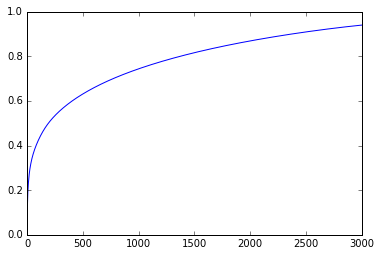

In [51]:
# Let's visualize the 3000 components
cv = CountVectorizer(preprocessor=cleaner, ngram_range=(1,2))
X = cv.fit_transform(X_train)
tsvd = TruncatedSVD(n_components=3000)
tsvd.fit(X)
plt.plot(range(3000), tsvd.explained_variance_ratio_.cumsum())

**Let's use 3000 components to see how it affects our model**

### Bagged Random Forest with TruncatedSVD

In [44]:
# Instantiate a Random Forest classifier with 15 estimators
rfc = RandomForestClassifier(n_estimators=15)

In [45]:
# Make modeling steps for Bagged Random Forest
rfc_bag_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner, ngram_range=(1,2))),
    ("truncatedSVD", TruncatedSVD(n_components=3000)),
    ("rfc_bagger", BaggingClassifier(rfc, n_estimators=15))
]

In [46]:
# Make Bagged Random Forest pipeline
rfc_bag_pipe = Pipeline(rfc_bag_modeling_steps)

In [47]:
# Fit Bagged Random Forest pipe
rfc_bag_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2),
        preprocessor=<function cleane...estimators=15, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False))])

In [48]:
# Check score and metrics for Bagged Random Forest training set
print(rfc_bag_pipe.score(X_train,y_train))
train_predictions = rfc_bag_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.983961352657
[[ 799   83]
 [   0 4293]]
             precision    recall  f1-score   support

          0       1.00      0.91      0.95       882
          1       0.98      1.00      0.99      4293

avg / total       0.98      0.98      0.98      5175



**Better than most except the standard count vectorizer.  Same amount of true positives as standard count vectorizer**

In [49]:
# Check score and metrics for Bagged Random Forest testing set
print(rfc_bag_pipe.score(X_test, y_test))
test_predictions = rfc_bag_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.926245586505
[[ 252  182]
 [   6 2109]]
             precision    recall  f1-score   support

          0       0.98      0.58      0.73       434
          1       0.92      1.00      0.96      2115

avg / total       0.93      0.93      0.92      2549



**Not good at all :(**

### Bagged Logistic Regression with TruncatedSVD

In [50]:
# Instatiate Logistic Regression
log_reg = LogisticRegressionCV()

In [54]:
# Make modeling steps for Bagged Logistic Regression
bag_log_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner, ngram_range=(1,2))),
    ("truncatedSVD", TruncatedSVD(n_components=3000)),
    ("log_reg_bagger", BaggingClassifier(log_reg, n_estimators=15))
]

In [55]:
# Make Bagged Logistic Regression pipeline
bag_log_pipe = Pipeline(bag_log_modeling_steps)

In [56]:
# Fit Bagged Logistic Regression pipe
bag_log_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2),
        preprocessor=<function cleane...estimators=15, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False))])

In [57]:
# Check score and metrics for Bagged Logistic Regression training set
print(bag_log_pipe.score(X_train,y_train))
train_predictions = bag_log_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.993043478261
[[ 848   34]
 [   2 4291]]
             precision    recall  f1-score   support

          0       1.00      0.96      0.98       882
          1       0.99      1.00      1.00      4293

avg / total       0.99      0.99      0.99      5175



**Best of them all logistic regressions!**

In [58]:
# Check score and metrics for Bagged Logistic Regression testing set
print(bag_log_pipe.score(X_test, y_test))
test_predictions = bag_log_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.95449195763
[[ 352   82]
 [  34 2081]]
             precision    recall  f1-score   support

          0       0.91      0.81      0.86       434
          1       0.96      0.98      0.97      2115

avg / total       0.95      0.95      0.95      2549



**Best accuracy but not by much over standard count vectorizer. Less true positives but more true negatives**

### Final Step:  Grid Search Logistic Regression Over Stanard Count Vectorizer and Tfidf Vectorizer n_gram(1,2)

In [59]:
# Instantiate standard count vectorizer
cv = CountVectorizer(preprocessor=cleaner)

# Fit and transform training set with count vectorizer
X_train_cv = cv.fit_transform(X_train)

# Transform testing set with count vectorizer
X_test_cv = cv.transform(X_test)

In [60]:
# Instantiate Logistic Regression
log_reg = LogisticRegressionCV()

# Make dictionary of logistic regression parameters to grid search over
log_reg_params = {
    'Cs': [1, 10, 100],
    'max_iter': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}

# Instantiate Grid Search
gs = GridSearchCV(log_reg, log_reg_params, verbose=2, n_jobs=-1)

# Fit Grid Search
gs.fit(X_train_cv, y_train)

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  4.1min finished


Fitting 3 folds for each of 30 candidates, totalling 90 fits


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'Cs': [1, 10, 100], 'max_iter': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [61]:
# Find best parameters
gs.best_params_

{'Cs': 10, 'max_iter': 10}

In [62]:
# Check score and metrics of best estimator for training set
print(gs.best_estimator_.score(X_train_cv, y_train))
train_predictions = gs.best_estimator_.predict(X_train_cv)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.999033816425
[[ 878    4]
 [   1 4292]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       882
          1       1.00      1.00      1.00      4293

avg / total       1.00      1.00      1.00      5175



**Good but probably overfit**

In [63]:
# Check score and metrics of best parameter for testing set
print(gs.best_estimator_.score(X_test_cv, y_test))
test_predictions = gs.best_estimator_.predict(X_test_cv)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.956845821891
[[ 365   69]
 [  41 2074]]
             precision    recall  f1-score   support

          0       0.90      0.84      0.87       434
          1       0.97      0.98      0.97      2115

avg / total       0.96      0.96      0.96      2549



**Better than standard logistic regression!**

### Grid Searching Number of Estimators for Bagging

In [65]:
# Instantiate best Logistic Regression estimator
log_reg= LogisticRegressionCV(Cs=10, max_iter=10)

In [26]:
# Instatiate Bagged Logistic Regression
log_reg_bagger = BaggingClassifier(log_reg, n_jobs=-1, verbose=1)

# Make dictionary of Bagged Logistic Regression parameters to grid search over
log_reg_bagger_params = {
    'n_estimators': [10, 15, 20]
}

# Instantiate Grid Search
gs = GridSearchCV(log_reg_bagger, log_reg_bagger_params, verbose=2, n_jobs=-1)

# Fit Grid Search
gs.fit(X_train_cv, y_train)

[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  2.4min finished
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   36.1s remaining:   36.1s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   37.3s finished


Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=None, error_score='raise',
       estimator=BaggingClassifier(base_estimator=LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbf..._estimators=10, n_jobs=-1, oob_score=False,
         random_state=None, verbose=1, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 15, 20]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=1)

In [27]:
# Find best parameter
gs.best_params_

{'n_estimators': 20}

**More estimators will probably give better scores.  I won't grid search further from these number of estimators**

In [28]:
# Check score and metrics of best estimator for training set
print(gs.best_estimator_.score(X_train_cv, y_train))
train_predictions = gs.best_estimator_.predict(X_train_cv)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    3.4s remaining:    3.4s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    5.1s finished
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    3.2s remaining:    3.2s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    4.3s finished


0.986666666667
[[ 818   64]
 [   5 4288]]
             precision    recall  f1-score   support

          0       0.99      0.93      0.96       882
          1       0.99      1.00      0.99      4293

avg / total       0.99      0.99      0.99      5175



** Worse with grid search and more parameters**

In [30]:
# Check score and metrics of best estimator for testing set
print(gs.best_estimator_.score(X_test_cv, y_test))
test_predictions = gs.best_estimator_.predict(X_test_cv)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    2.7s remaining:    2.7s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    3.7s finished
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    2.8s remaining:    2.8s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    3.8s finished


[[ 341   93]
 [  34 2081]]
             precision    recall  f1-score   support

          0       0.91      0.79      0.84       434
          1       0.96      0.98      0.97      2115

avg / total       0.95      0.95      0.95      2549



Accuracy - .946833463643471

** Worse with grid search and more parameters**

### Try just non bagged Logistic Regression and Grid Search Regularization Strength

In [37]:
# Instantiate best Logistic Regression estimator
log_reg = LogisticRegressionCV(max_iter=10, n_jobs=1, verbose=2) 

# Make dictionary of Logistic Regression parameter to grid search over
log_reg_params = {
    'Cs' : [2, 4, 6, 8],
}

# Instantiate Grid Search
gs = GridSearchCV(log_reg, log_reg_params, verbose=1, n_jobs=1)

# Fit Grid Search
gs.fit(X_train_cv, y_train)

In [32]:
# Find best estimator
gs.best_estimator_

LogisticRegressionCV(Cs=6, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=2)

In [34]:
# Check score and metrics of best estimator for training set
print(gs.best_estimator_.score(X_train_cv, y_train))
train_predictions = gs.best_estimator_.predict(X_train_cv)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.997874396135
[[ 873    9]
 [   2 4291]]
             precision    recall  f1-score   support

          0       1.00      0.99      0.99       882
          1       1.00      1.00      1.00      4293

avg / total       1.00      1.00      1.00      5175



**Pretty much the same but slightly worse**

In [35]:
# Check score and metrics of best estimator for testing set
print(gs.best_estimator_.score(X_test_cv, y_test))
test_predictions = gs.best_estimator_.predict(X_test_cv)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.95135347195
[[ 346   88]
 [  36 2079]]
             precision    recall  f1-score   support

          0       0.91      0.80      0.85       434
          1       0.96      0.98      0.97      2115

avg / total       0.95      0.95      0.95      2549



**Not as good.  Let's try more cv's**

In [66]:
# Instantiate best Logistic Regression estimator
log_reg = LogisticRegressionCV(Cs=10, max_iter=10, n_jobs=1, verbose=2) 

# Make dictionary of Logistic Regression parameter to grid search over
log_reg_params = {
    'cv' : [3, 4, 5],
}

# Instantiate Grid Search
gs = GridSearchCV(log_reg, log_reg_params, verbose=1, n_jobs=1)

# Fit Grid Search
gs.fit(X_train_cv, y_train)

C:\Users\knockitupanotch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:718: UserWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s finished
C:\Users\knockitupanotch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:718: UserWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.0s finished
C:\Users\knockitupanotch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:718: UserWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "
[Parallel(

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=10,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=2),
       fit_params=None, iid=True, n_jobs=1, param_grid={'cv': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [67]:
# Find best estimator
gs.best_estimator_

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=10,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=2)

In [68]:
# Check score and metrics of best estimator for training set
print(gs.best_estimator_.score(X_train_cv, y_train))
train_predictions = gs.best_estimator_.predict(X_train_cv)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.999033816425
[[ 878    4]
 [   1 4292]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       882
          1       1.00      1.00      1.00      4293

avg / total       1.00      1.00      1.00      5175



**Better with more true negatives**

In [69]:
# Check score and metrics of best estimator for testing set
print(gs.best_estimator_.score(X_test_cv, y_test))
test_predictions = gs.best_estimator_.predict(X_test_cv)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.958807375441
[[ 370   64]
 [  41 2074]]
             precision    recall  f1-score   support

          0       0.90      0.85      0.88       434
          1       0.97      0.98      0.98      2115

avg / total       0.96      0.96      0.96      2549



**Best estimator!  More true negatives and same amount of true positives.**

In [45]:
#Could try reruning with less iterations.  Otherwise score is comparable to out of box logistic regression.  
#Maybe try more cv's.
print(gs.best_estimator_.score(X_test_cv, y_test))
test_predictions = gs.best_estimator_.predict(X_test_cv)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.954884268341
[[ 358   76]
 [  39 2076]]
             precision    recall  f1-score   support

          0       0.90      0.82      0.86       434
          1       0.96      0.98      0.97      2115

avg / total       0.95      0.95      0.95      2549



** Let's settle on Logistic Regression with Cs = 10, cv=5, max_iter=10).  Try this will different Tfidf Vectorizer.**

In [45]:
# Make modeling steps for Logistic Regression with Tfidf Vectorizer
log_reg_modeling_steps = [
    ("tfidf_vectorizer", TfidfVectorizer(preprocessor=cleaner, ngram_range=(1,2))),
    ("log_reg", LogisticRegressionCV(Cs=10, cv=5, max_iter=10))
]

In [46]:
# Make Logistic Regression pipeline
log_reg_pipe=Pipeline(log_reg_modeling_steps)

In [47]:
# Fit Logistic Regression pipe
log_reg_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf_vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2',
        preprocessor=<func...2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0))])

In [49]:
# Check score and metrics for Logistic Regression training set
print(log_reg_pipe.score(X_train, y_train))
train_predictions = log_reg_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

1.0
[[ 882    0]
 [   0 4293]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       882
          1       1.00      1.00      1.00      4293

avg / total       1.00      1.00      1.00      5175



**Overfit!**

In [51]:
# Check score and metrics for Logistic Regression testing set
print(log_reg_pipe.score(X_test, y_test))
test_predictions = log_reg_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.948999607689
[[ 331  103]
 [  27 2088]]
             precision    recall  f1-score   support

          0       0.92      0.76      0.84       434
          1       0.95      0.99      0.97      2115

avg / total       0.95      0.95      0.95      2549



# Final test.  Base Logistic Model vs. New Logistic Model vs. Linear SVM 

In [52]:
# Make modeling steps for New Logistic Regression
new_log_reg_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ("log_reg", LogisticRegressionCV(Cs=10, cv=5, max_iter=10))
]

In [53]:
# Make New Logistic Regression pipeline
new_log_reg_pipe = Pipeline(new_log_reg_modeling_steps)

In [54]:
# Fit New Logsitic Regression pipe
new_log_reg_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0))])

In [55]:
# Check score and metrics for New Logistic Regression training set
print(new_log_reg_pipe.score(X_train, y_train))
train_predictions = new_log_reg_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.993236714976
[[ 853   29]
 [   6 4287]]
             precision    recall  f1-score   support

          0       0.99      0.97      0.98       882
          1       0.99      1.00      1.00      4293

avg / total       0.99      0.99      0.99      5175



**Not as overfit**

In [56]:
# Check score and metrics for New Logistic Regression testing set
print(new_log_reg_pipe.score(X_test, y_test))
test_predictions = new_log_reg_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.95135347195
[[ 343   91]
 [  33 2082]]
             precision    recall  f1-score   support

          0       0.91      0.79      0.85       434
          1       0.96      0.98      0.97      2115

avg / total       0.95      0.95      0.95      2549



**Pretty good test**

In [57]:
# Make modeling steps for Base Logistic Regression
base_log_reg_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ("log_reg", LogisticRegressionCV())
]

In [58]:
# Make Base Logistic Regression pipeline
base_log_reg_pipe = Pipeline(base_log_reg_modeling_steps)

In [59]:
# Fit Base Logistic Regression pipe
base_log_reg_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0))])

In [60]:
# Check score and metrics for Base Logistic Regression training set
print(base_log_reg_pipe.score(X_train, y_train))
train_predictions = base_log_reg_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.993816425121
[[ 854   28]
 [   4 4289]]
             precision    recall  f1-score   support

          0       1.00      0.97      0.98       882
          1       0.99      1.00      1.00      4293

avg / total       0.99      0.99      0.99      5175



**Slightly more overfit**

In [61]:
# Check score and metrics for Base Logistic Regression testing set
print(base_log_reg_pipe.score(X_test, y_test))
test_predictions = base_log_reg_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.95135347195
[[ 342   92]
 [  32 2083]]
             precision    recall  f1-score   support

          0       0.91      0.79      0.85       434
          1       0.96      0.98      0.97      2115

avg / total       0.95      0.95      0.95      2549



**One more true positive, one less true negative**

In [62]:
# Make modeling steps for Linear SVM
svm_linear_modeling_steps = [
    ("count_vectorizer", CountVectorizer(preprocessor=cleaner)),
    ("svm", SVC(kernel='linear'))
]

In [63]:
# Make Linear SVM pipeline
svm_linear_pipe=Pipeline(svm_linear_modeling_steps)

In [64]:
# Fit linear SVM pipe
svm_linear_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1),
        preprocessor=<function cleane...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [65]:
# Check score and metrics for Linear SVM training set
print(svm_linear_pipe.score(X_train, y_train))
train_predictions = svm_linear_pipe.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

0.994975845411
[[ 860   22]
 [   4 4289]]
             precision    recall  f1-score   support

          0       1.00      0.98      0.99       882
          1       0.99      1.00      1.00      4293

avg / total       0.99      0.99      0.99      5175



**Most overfit**

In [66]:
# Check score and metrics for Linear SVM testing set
print(svm_linear_pipe.score(X_test, y_test))
test_predictions = svm_linear_pipe.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

0.945468811299
[[ 341   93]
 [  46 2069]]
             precision    recall  f1-score   support

          0       0.88      0.79      0.83       434
          1       0.96      0.98      0.97      2115

avg / total       0.94      0.95      0.94      2549



**Loser**

# Base logistic regression model is the winner due to one more true positive!